In [1]:
import pandas as pd
from collections import Counter
import string
import nltk  # Add this line
df = pd.read_csv("chat_data.csv")
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re

# Download the NLTK stop words if not already downloaded
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tyler\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
df = pd.read_csv("chat_data.csv")
print(df.head())

   Unnamed: 0                                               text  class
0           0   I'm considering enrolling in a survival train...      0
1           1   They're attacking from all directions, we're ...      0
2           2             Completely exposed, it's a lost cause.      0
3           3   We're in a losing battle, no light at the end...      0
4           4   We're like flies drawn to a spider's web. We ...      0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5200 non-null   int64 
 1   text        5200 non-null   object
 2   class       5200 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 122.0+ KB


In [4]:
# Convert the 'text' column to string type
df['text'] = df['text'].astype(str)

# Split the text into lists of words
df['text'] = df['text'].str.split()

# Initialize an empty list to store words with their indices
word_list = []

# Iterate over each row in the DataFrame
for idx, row in df.iterrows():
    words = row['text']
    for word in words:
        word_list.append(f"{idx}: {word}")

# Convert the list of words to a DataFrame
word_df = pd.DataFrame({'word': word_list})

# Access individual words by index
print(word_df['word'][0])  # Output: "0: I'm"
print(word_df['word'][1000])  # Output: "0: considering"

0: I'm
104: PUBG.


In [5]:
# Combine all words into a single list
all_words = [word.split(":")[1] for word in word_df['word']]

# Count the occurrences of each word
word_counts = Counter(all_words)

# Print the word counts
for word, count in word_counts.items():
    print(f"'{word}': {count} times")

' I'm': 384 times
' considering': 6 times
' enrolling': 1 times
' in': 637 times
' a': 1462 times
' survival': 14 times
' training': 2 times
' program': 1 times
' after': 32 times
' this': 520 times
' disaster.': 15 times
' They're': 125 times
' attacking': 1 times
' from': 172 times
' all': 152 times
' directions,': 1 times
' we're': 335 times
' overwhelmed.': 10 times
' Completely': 14 times
' exposed,': 9 times
' it's': 271 times
' lost': 51 times
' cause.': 7 times
' We're': 428 times
' losing': 23 times
' battle,': 11 times
' no': 448 times
' light': 7 times
' at': 195 times
' the': 1575 times
' end': 20 times
' of': 866 times
' tunnel.': 1 times
' like': 456 times
' flies': 5 times
' drawn': 1 times
' to': 988 times
' spider's': 4 times
' web.': 1 times
' We': 116 times
' walked': 7 times
' right': 64 times
' into': 131 times
' their': 342 times
' trap.': 5 times
' Well,': 78 times
' distractions': 54 times
' were': 141 times
' about': 69 times
' as': 231 times
' effective': 20 t

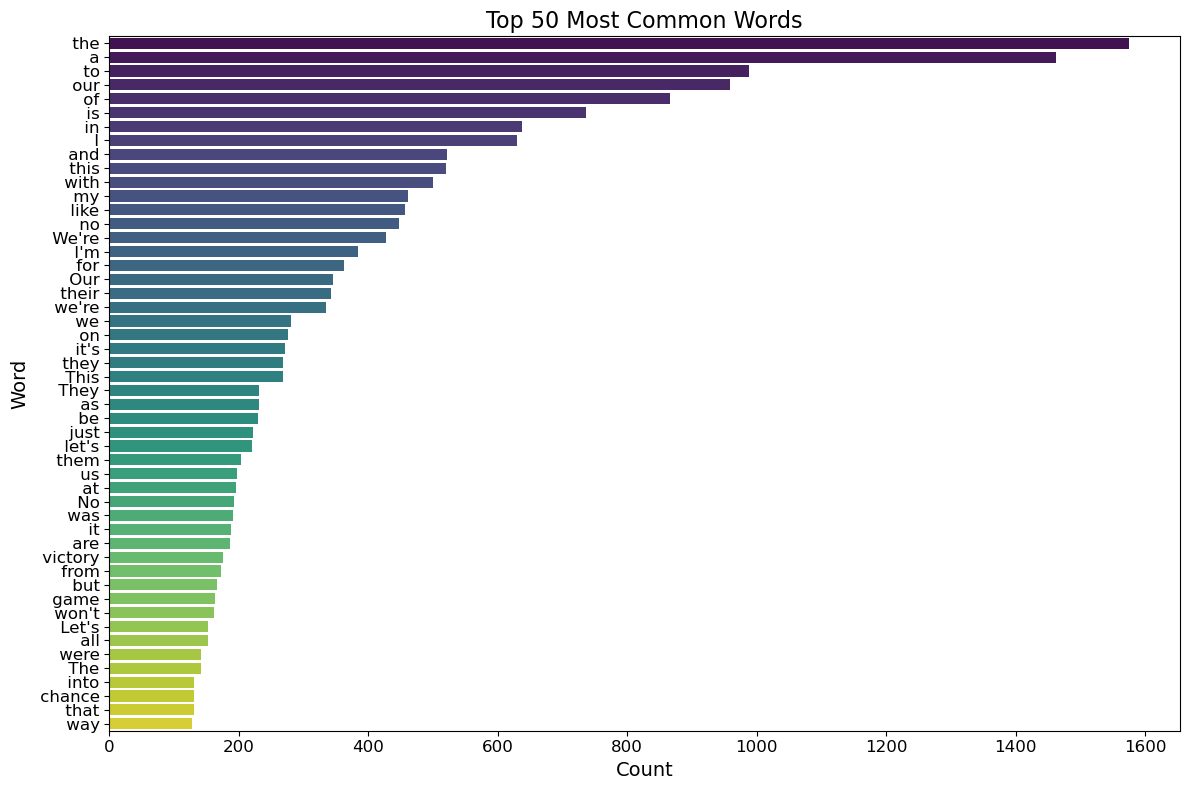

Counter({' the': 1575, ' a': 1462, ' to': 988, ' our': 959, ' of': 866, ' is': 737, ' in': 637, ' I': 629, ' and': 521, ' this': 520, ' with': 500, ' my': 462, ' like': 456, ' no': 448, " We're": 428, " I'm": 384, ' for': 362, ' Our': 346, ' their': 342, " we're": 335, ' we': 280, ' on': 276, " it's": 271, ' they': 269, ' This': 269, ' They': 232, ' as': 231, ' be': 230, ' just': 222, " let's": 221, ' them': 203, ' us': 197, ' at': 195, ' No': 192, ' was': 191, ' it': 188, ' are': 186, ' victory': 175, ' from': 172, ' but': 167, ' game': 164, " won't": 161, " Let's": 153, ' all': 152, ' were': 141, ' The': 141, ' into': 131, ' chance': 131, ' that': 131, ' way': 128, ' an': 126, ' can': 126, " They're": 125, ' enemies': 121, ' have': 119, " can't": 119, ' out': 117, ' We': 116, ' up': 115, ' make': 112, ' me': 109, " It's": 107, ' by': 102, ' never': 99, ' Their': 95, ' got': 94, ' My': 94, ' enemy': 93, ' these': 91, " I've": 85, ' squad': 85, ' feeling': 83, ' every': 82, ' when': 81

In [6]:
# Combine all words into a single list
all_words = [word.split(":")[1] for word in word_df['word']]

# Count the occurrences of each word
word_counts = Counter(all_words)

# Get the top 50 most common words
top_50_words = word_counts.most_common(50)

# Create a DataFrame for the top 50 words
top_50_df = pd.DataFrame(top_50_words, columns=['Word', 'Count'])

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=top_50_df, x='Count', y='Word', palette='viridis')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.title('Top 50 Most Common Words', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()
print(word_counts)

In [7]:
# Function to create and display a grouped bar plot
def create_grouped_bar_plot(data, x, y, title):
    plt.figure(figsize=(12, 8))
    sns.barplot(data=data, x=x, y=y, hue='Sentiment', palette='viridis')
    plt.xlabel('Word', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.legend(title='Sentiment', fontsize=12)
    plt.show()

C:\Users\tyler\AppData\Local\Temp\ipykernel_13340\2891062107.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word_counts_combined = word_counts_combined.append(pd.DataFrame({


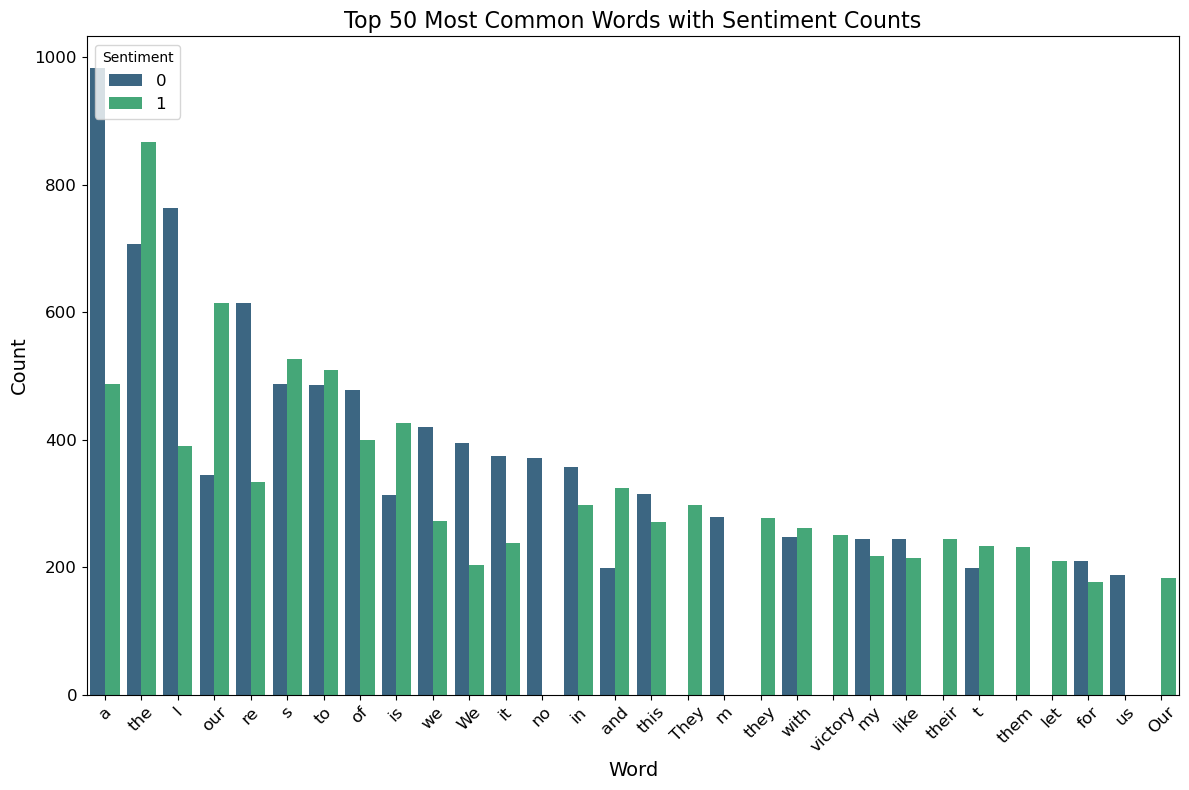

In [8]:
# Initialize lists to store word counts for '0' and '1' sentiments
word_counts_0 = []
word_counts_1 = []

# Iterate over each row in the DataFrame
for idx, row in df.iterrows():
    text = row['text']
    
    # Check if text is a list and concatenate its elements into a single string
    if isinstance(text, list):
        text = ' '.join(map(str, text))
    
    words = re.findall(r'\w+', text)  # Split the text into words using regex
    sentiment = int(row['class'])
    if sentiment == 0:
        word_counts_0.extend(words)
    elif sentiment == 1:
        word_counts_1.extend(words)

# Count the occurrences of words for both '0' and '1' sentiments
word_counts_0 = pd.Series(word_counts_0).value_counts()
word_counts_1 = pd.Series(word_counts_1).value_counts()

# Combine the counts into a single DataFrame
word_counts_combined = pd.DataFrame({
    'Word': word_counts_0.index,
    'Count': word_counts_0.values,
    'Sentiment': '0',
})

# Add the counts for '1' sentiment
word_counts_combined = word_counts_combined.append(pd.DataFrame({
    'Word': word_counts_1.index,
    'Count': word_counts_1.values,
    'Sentiment': '1',
}))

# Sort by total count
word_counts_combined = word_counts_combined.sort_values(by='Count', ascending=False).head(50)

# Create a grouped bar plot with two bars for each word
create_grouped_bar_plot(word_counts_combined, x='Word', y='Count', title='Top 50 Most Common Words with Sentiment Counts')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tyler\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\tyler\AppData\Local\Temp\ipykernel_13340\1558531455.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  word_counts_combined = word_counts_combined.append(pd.DataFrame({


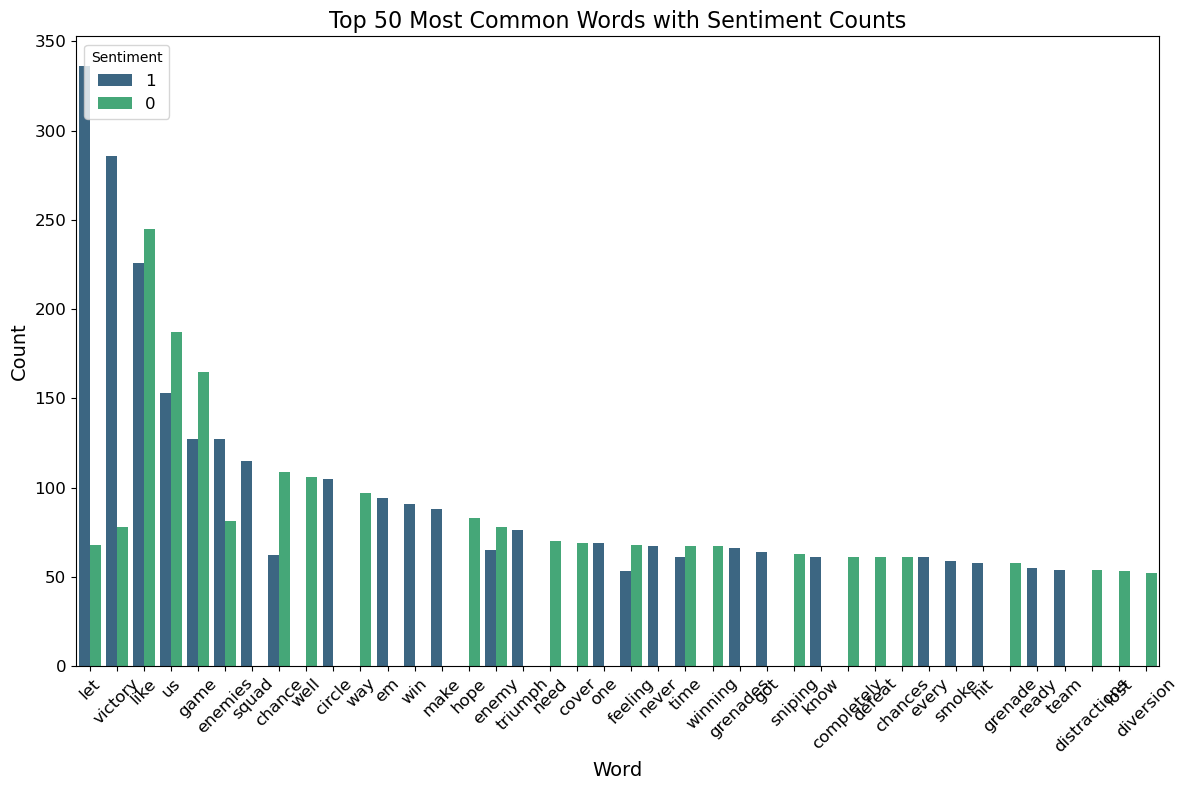

In [13]:
import nltk
from nltk.corpus import stopwords
import re
import pandas as pd

nltk.download('stopwords')

# Initialize lists to store word counts for '0' and '1' sentiments
word_counts_0 = []
word_counts_1 = []

# Get the list of NLTK stop words
stop_words = set(stopwords.words('english'))

# Iterate over each row in the DataFrame
for idx, row in df.iterrows():
    text = row['text']
    
    # Check if text is a list and concatenate its elements into a single string
    if isinstance(text, list):
        text = ' '.join(map(str, text))
    
    words = re.findall(r'\w+', text)  # Split the text into words using regex
    sentiment = int(row['class'])
    words = [word.lower() for word in words if word.lower() not in stop_words]  # Filter out stop words
    if sentiment == 0:
        word_counts_0.extend(words)
    elif sentiment == 1:
        word_counts_1.extend(words)

# Count the occurrences of words for both '0' and '1' sentiments
word_counts_0 = pd.Series(word_counts_0).value_counts()
word_counts_1 = pd.Series(word_counts_1).value_counts()

# Combine the counts into a single DataFrame
word_counts_combined = pd.DataFrame({
    'Word': word_counts_0.index,
    'Count': word_counts_0.values,
    'Sentiment': '0',
})

# Add the counts for '1' sentiment
word_counts_combined = word_counts_combined.append(pd.DataFrame({
    'Word': word_counts_1.index,
    'Count': word_counts_1.values,
    'Sentiment': '1',
}))

# Sort by total count
word_counts_combined = word_counts_combined.sort_values(by='Count', ascending=False).head(50)

# Create a grouped bar plot with two bars for each word
create_grouped_bar_plot(word_counts_combined, x='Word', y='Count', title='Top 50 Most Common Words with Sentiment Counts')


In [15]:
df2 = pd.DataFrame(word_counts_combined)
df2.to_csv("graph2")

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Combine the list of strings into a single string
df['text'] = df['text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# Vectorize the text using unigrams and bigrams
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=5)
X = vectorizer.fit_transform(df['text'])

# Convert the result to a DataFrame
ngram_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the n-gram DataFrame with the original DataFrame
df_ngrams = pd.concat([df, ngram_df], axis=1)

# Reset the index before performing groupby
df_ngrams_reset = df_ngrams.reset_index()

# Calculate the sum of each n-gram for positive and negative sentiments
ngram_sums = df_ngrams_reset.groupby('class').sum().T

# Print the top 10 n-grams for each sentiment
print("Top 10 Positive N-grams:")
print(ngram_sums[1].nlargest(10))
print("\nTop 10 Negative N-grams:")
print(ngram_sums[0].nlargest(10))


Top 10 Positive N-grams:
index         10138700
Unnamed: 0    10138700
let                336
victory            286
like               226
won                147
enemies            127
game               127
squad              115
ll                 112
Name: 1, dtype: int64

Top 10 Negative N-grams:
index         3378700
Unnamed: 0    3378700
like              245
just              187
game              165
chance            109
ve                105
way                97
hope               83
enemies            81
Name: 0, dtype: int64


C:\Users\tyler\AppData\Local\Temp\ipykernel_13340\2741237315.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ngram_sums = df_ngrams_reset.groupby('class').sum().T


In [11]:
from nltk.util import ngrams
from collections import Counter

# Assuming your dataframe is named df
text_data = df['text'].str.lower().str.cat(sep=' ')

# Tokenize the text
tokens = word_tokenize(text_data)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

# Generate bigrams
bigrams = list(ngrams(filtered_tokens, 2))

# Create a list to store sentiments corresponding to each bigram
sentiments = []

# Iterate over each bigram and assign the sentiment
for bigram in bigrams:
    # Check if the bigram exists in the dataframe
    bigram_str = ' '.join(bigram)
    if any(df['text'].str.lower().str.contains(bigram_str)):
        sentiment = df[df['text'].str.lower().str.contains(bigram_str)]['class'].values[0]
        sentiments.append((bigram_str, sentiment))

# Count the occurrences of each sentiment-bigram pair
sentiment_bigram_counts = Counter(sentiments)

# Print the top 25 common sentiment-bigram pairs
print("Top 25 Common Sentiment-Bigrams:")
for sentiment_bigram, count in sentiment_bigram_counts.most_common(25):
    print(sentiment_bigram, count)


NameError: name 'word_tokenize' is not defined

In [ ]:
from nltk.util import ngrams
from collections import Counter

# Assuming your dataframe is named df
text_data = df['text'].str.lower().str.cat(sep=' ')

# Tokenize the text
tokens = word_tokenize(text_data)

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]

# Generate bigrams
bigrams = list(ngrams(filtered_tokens, 2))

# Count the occurrences of each bigram
bigram_counts = Counter(bigrams)

# Print the top 25 common bigrams
print("Top 25 Common Bigrams:")
for bigram, count in bigram_counts.most_common(25):
    print(bigram, count)


Top 25 Common Bigrams:
('let', 'make') 55
('wo', 'know') 46
('know', 'hit') 43
('ca', 'believe') 42
('smoke', 'bombs') 40
('feels', 'like') 38
('gon', 'na') 34
('enemy', 'squad') 29
('victory', 'within') 29
('hope', 'left') 28
('stand', 'chance') 28
('looks', 'like') 26
('feeling', 'like') 25
('enemies', 'must') 24
('chicken', 'dinner') 23
('every', 'move') 22
('wo', 'see') 22
('lost', 'cause') 21
('smoke', 'grenade') 21
('chance', 'winning') 21
('see', 'us') 21
('driving', 'skills') 21
('diversion', 'tactics') 21
('chances', 'winning') 21
('upper', 'hand') 21


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract bigrams and counts from the Counter
bigram_tuples = sentiment_bigram_counts.most_common(25)
bigrams = [' '.join(item[0]) for item in bigram_tuples]
counts = [item[1] for item in bigram_tuples]

# Plot the horizontal bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=counts, y=bigrams, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Bigram Pair')
plt.title('Top 25 Common Bigram Pairs')
plt.tight_layout()
plt.show()


TypeError: sequence item 1: expected str instance, numpy.int64 found